### Data visualization with Matplotlib

#### Real estate market exploration

The objective of the exercise is to implement some visualization techniques in Python. We will use the following packages : Matplotlib, Scipy and pandas.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/shahul/Desktop/house_pricing.csv')
df = pd.DataFrame(df)
print("the dimension of df if ", df.ndim) # to know the dimension of a dataframe 

the dimension of df if  2



    Print the shape of df
    Print the columns' name of df
    Print the 5 first lines of df

In [122]:
print ("the shape of df is ", df.shape, "\n")
print("those are df columns : ", df.columns)
df.head()


the shape of df is  (1460, 81) 

those are df columns :  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Ga

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Info : you'll find the price data in the SalesPrice column

    Using a histogram and a Gaussian density, analyze the distribution of the market price.

        To plot a Gaussian density distribution, the scipy.stats package is needed. Loaded as stats, it can be used as follows :

        kde = stats.kde.gaussian_kde(df['SalePrice'])
        x = np.linspace(0, 750000, 100)
        y = kde(x)

    Add labels and titles to your graphs



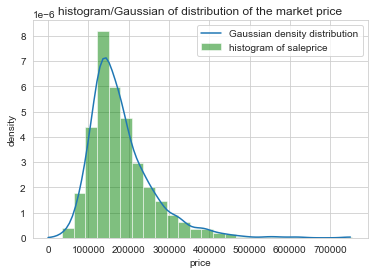

The curve shows the density plot which is essentially a smooth version of the histogram. 
it seems like the market price follow a normal distribution


In [30]:
import scipy.stats as stats

kde = stats.kde.gaussian_kde(df['SalePrice'])
x = np.linspace(0, 750000, 100)
y = kde(x)

plt.plot(x,y, label = 'Gaussian density distribution')
plt.hist(df['SalePrice'], bins=25, density=True, alpha=0.5, color='g', label ='histogram of saleprice')
plt.title('histogram/Gaussian of distribution of the market price')
plt.xlabel ('price')
plt.ylabel('density')
plt.legend();
plt.show()
print('''The curve shows the density plot which is essentially a smooth version of the histogram. 
it seems like the market price follow a normal distribution''')




The TotalBsmtSF and GrLivArea columns hold the data for basement and living area in square feet.

Using two different scatter plots, represent the sales price as a function of both these features

Add labels and titles to your graphs


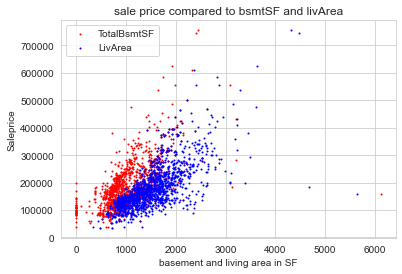

In [120]:
plt.scatter(df.TotalBsmtSF,df.SalePrice, c = 'red', s= 1, label = "TotalBsmtSF")
plt.scatter(df.GrLivArea,df.SalePrice, c = 'blue', s= 1, label = "LivArea")
plt.ylabel('Saleprice')
plt.xlabel('basement and living area in SF')
plt.title('sale price compared to bsmtSF and livArea')
plt.legend();


What analysis can you make on the 2 graphs ? What seems to be the relation between the data ?

In [59]:
print('''
As an analysis we can observe that prices are correlated with ground living area and basement in square feet. 
Prices are increasing poportionnaly with the square feet . Additionnaly we can say also that basement and living 
area have same progression exept that GrvlivArea is lightly shifted to right compared to BsmtSF plot.''')


As an analysis we can observe that prices are correlated with ground living area and basement in square feet. 
Prices are increasing poportionnaly with the square feet . Additionnaly we can say also that basement and living 
area have same progression exept that GrvlivArea is lightly shifted to right compared to BsmtSF plot.


In statistical data visualization, box plots a quick way to describe the behavior of the data inside a distribution. The values that are out of the box plot are considered to be outliers.

OverallQual takes a discrete value between 1 and 10, standing for the overall quality of the house.
On a single graph, plot the box plot diagram for the sale price for each quality level


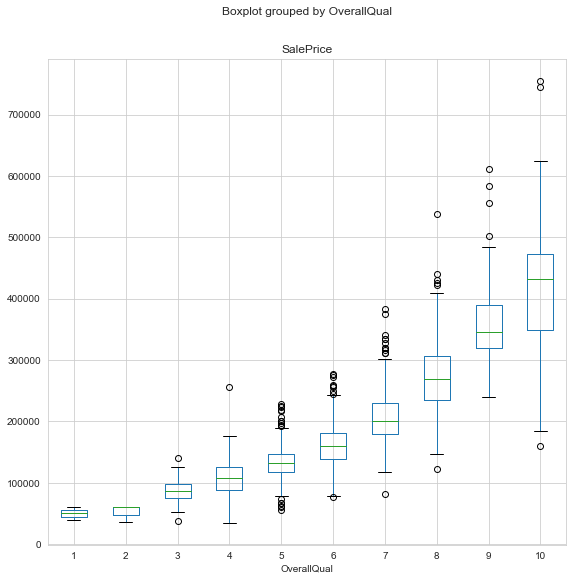

In [80]:
#df = pd.read_csv('/Users/shahul/Desktop/house_pricing.csv')
#df = pd.DataFrame(df)

df.boxplot(column= 'SalePrice', by='OverallQual', figsize= (9,9));


Going back to the scatter plot of price as a function of living area

Colorize the points according to their quality of finish level

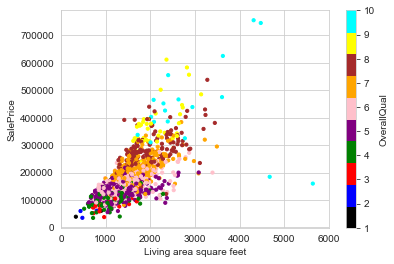

In [119]:
import matplotlib
color=['black','blue','red','green','purple','pink','orange','brown', 'yellow', 'cyan']
plt.scatter(x = df.GrLivArea, y =df.SalePrice,  c =df.OverallQual, s=10, 
            cmap=matplotlib.colors.ListedColormap(color))
plt.xlim(0,6000)
plt.xlabel('Living area square feet');
plt.ylabel('SalePrice')
cb = plt.colorbar(label = 'OverallQual')